# K means

For simplicity I made my own dataset and to be precice with clustering model.

### Loading Libraries and Dataset

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [28]:
dfx = pd.read_csv('workout.csv')
dfx.head()

,distance,duration
0,3.0,15.0
1,2.0,10.0
2,3.0,14.0
3,1.1,13.0
4,3.1,15.0


### Standardizing the Attributes/Clustering variables

In [29]:
scaler = StandardScaler()
df = scaler.fit_transform(dfx)

### The Number of Clusters
Using elbow method to determined the appropriate k value

Text(0, 0.5, 'inertia')

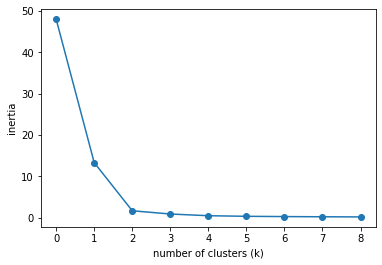

In [34]:
inertias = []

# try for 9 k
for k in range(1,10):
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(df)
  
  # append model to cluster list   
  inertias.append(km.inertia_)
  
plt.plot(range(len(inertias)), inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

The the elbow of the curve is around K= 3. For values of K greater than 3, the distortion value starts decaying steadily.

### Silhouette score 
The Silhouette score is used to measure the degree of separation between clusters.

In [35]:
for i in range(1,9,1): 
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(df, clusters[i].predict(df)))

---------------------------------------
KMeans(n_clusters=2, random_state=0)
Silhouette score: 0.6801797235765018
---------------------------------------
KMeans(n_clusters=3, random_state=0)
Silhouette score: 0.8351218705865465
---------------------------------------
KMeans(n_clusters=4, random_state=0)
Silhouette score: 0.7731312253479402
---------------------------------------
KMeans(n_clusters=5, random_state=0)
Silhouette score: 0.688104915054184
---------------------------------------
KMeans(n_clusters=6, random_state=0)
Silhouette score: 0.681491795677522
---------------------------------------
KMeans(n_clusters=7, random_state=0)
Silhouette score: 0.5528002466657722
---------------------------------------
KMeans(random_state=0)
Silhouette score: 0.49856889026365403
---------------------------------------
KMeans(n_clusters=9, random_state=0)
Silhouette score: 0.5189654084005246


As we can see from silhoutte and elbow method the optimal number of clusters is 3.

In [36]:
# Kmeans object with 3 clusters
km = KMeans(n_clusters=3, random_state=0)

In [37]:
# fir and predict labels
y_km = km.fit_predict(df)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2])

As expected the first observation up to index 8 are all in the same category. We made it this way.

### Visualization

#### Cetroid of each clusters

In [38]:
centers = km.cluster_centers_
centers

array([[ 0.96159769, -0.26768834],
       [-1.32707578, -1.06309601],
       [ 0.36547809,  1.33078435]])

#### Assigning each feature in a variable

In [39]:
# Make a scatter plot of distance and duration and using labels to define the colors
distance = df[:,0]
duration = df[:,1]

Text(0, 0.5, 'Duration(minutes)')

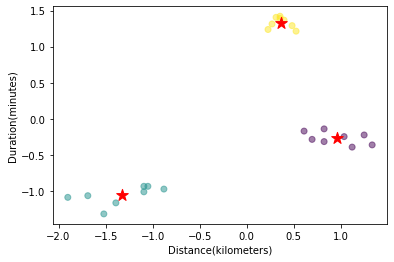

In [40]:
plt.scatter(distance, duration, c=y_km, alpha=0.5)

# replacing centroid by accessing 2d list (centers)
plt.scatter(centers[0][0], centers[0][1], marker='*', color ='r', s=150)
plt.scatter(centers[1][0], centers[1][1], marker='*', color ='r', s=150)
plt.scatter(centers[2][0], centers[2][1], marker='*', color ='r', s=150)

plt.xlabel('Distance(kilometers)')
plt.ylabel('Duration(minutes)')

Note: our dataset has been standarized at this point

We can now labels each cluster like this;
- 1 (team_blue) = lazy
- 2 (team_yellow) = not so fast
- 3 (team_purple)= fast

Just to recap, these are the pros and cons of using K-Means:

`pros`
- Easy to implement
- Only has one parameter to tune and you can easily see the direct impact of adjusting the value of   parameter K

`cons`
- Heavily affected by outliers
- Sensitive to random initialization

-fin